<a href="https://colab.research.google.com/github/Koyac/Image100knocks1/blob/restart/Image100knocks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/yoyoyo-yo/Gasyori100knock

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# DFT hyper-parameters
K, L = 128, 128
channel = 3


# DFT
def dft(img):
	H, W, _ = img.shape

	# Prepare DFT coefficient
	G = np.zeros((L, K, channel), dtype=np.complex)

	# prepare processed index corresponding to original image positions
	x = np.tile(np.arange(W), (H, 1))
	y = np.arange(H).repeat(W).reshape(H, -1)

	# dft
	for c in range(channel):
		for l in range(L):
			for k in range(K):
				G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)
				#for n in range(N):
				#    for m in range(M):
				#        v += gray[n, m] * np.exp(-2j * np.pi * (m * k / M + n * l / N))
				#G[l, k] = v / np.sqrt(M * N)

	return G

# IDFT
def idft(G):
	# prepare out image
	H, W, _ = G.shape
	out = np.zeros((H, W, channel), dtype=np.float32)

	# prepare processed index corresponding to original image positions
	x = np.tile(np.arange(W), (H, 1))
	y = np.arange(H).repeat(W).reshape(H, -1)

	# idft
	for c in range(channel):
		for l in range(H):
			for k in range(W):
				out[l, k, c] = np.abs(np.sum(G[..., c] * np.exp(2j * np.pi * (x * k / W + y * l / H)))) / np.sqrt(W * H)

	# clipping
	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out


img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.uint8)

G = dft(img)

ps = (np.abs(G)/np.abs(G).max()*255).astype(np.uint8)
cv2.imwrite("out_ps.jpg",ps)

out = idft(G)

cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

KeyboardInterrupt: ignored

In [18]:
K,L = 128,128
channel = 3

def bgr2gray(img):
  gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
  return gray

def dft(img):
  G = np.zeros((L,K,channel),dtype=np.complex)
  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshape(H,-1)

  for c in range(channel):
    for l in range(L):
      for k in range(K):
        G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)
  
  return G

def idft(G):
  H,W,_ = G.shape
  out = np.zeros((H,W,channel),dtype=np.float32)

  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshape(H,-1)

  for c in range(channel):
    for l in range(H):
      for k in range(W):
        out[l, k, c] = np.abs(np.sum(G[..., c] * np.exp(2j * np.pi * (x * k / W + y * l / H)))) / np.sqrt(W * H)
  out = out.clip(out,0,255)
  out = out.astype(np.uint8)
  return out

def lpf(G,ratio=0.5):
  H,W,_ = G.shape

  _G = np.zeros_like(G)
  _G[:H//2, :W//2] = G[H//2:, W//2:]
  _G[:H//2, W//2:] = G[H//2:, :W//2]
  _G[H//2:, :W//2] = G[:H//2, W//2:]
  _G[H//2:, W//2:] = G[:H//2, :W//2]
  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshpae(H,-1)

  _x = x - W//2
  _y = y - H//2
  r = np.sqrt(_x**2+_y**2)
  mask = np.ones((H,W),dtype=np.float32)
  mask[r>(W//2*ratio)] = 0

  mask = np.repeat(mask, channel).reshape(H, W, channel)

  _G *= mask

  G[:H//2, :W//2] = _G[H//2:, W//2:]
  G[:H//2, W//2:] = _G[H//2:, :W//2]
  G[H//2:, :W//2] = _G[:H//2, W//2:]
  G[H//2:, W//2:] = _G[:H//2, :W//2]

  return G

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)
H,W,C = img.shape

gray = bgr2gray(img)

G = dft(img)

G = lpf(G)

out = idft(G)
cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

KeyboardInterrupt: ignored

In [ ]:
K,L = 128,128
channel = 3

def bgr2gray(img):
  gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
  return gray

def dft(img):
  G = np.zeros((L,K,channel),dtype=np.complex)
  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshape(H,-1)

  for c in range(channel):
    for l in range(L):
      for k in range(K):
        G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)
  
  return G

def idft(G):
  H,W,_ = G.shape
  out = np.zeros((H,W,channel),dtype=np.float32)

  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshape(H,-1)

  for c in range(channel):
    for l in range(H):
      for k in range(W):
        out[l, k, c] = np.abs(np.sum(G[..., c] * np.exp(2j * np.pi * (x * k / W + y * l / H)))) / np.sqrt(W * H)
  out = out.clip(out,0,255)
  out = out.astype(np.uint8)
  return out

def lpf(G,ratio=0.1,ratio2=0.5):
  H,W,_ = G.shape

  _G = np.zeros_like(G)
  _G[:H//2, :W//2] = G[H//2:, W//2:]
  _G[:H//2, W//2:] = G[H//2:, :W//2]
  _G[H//2:, :W//2] = G[:H//2, W//2:]
  _G[H//2:, W//2:] = G[:H//2, :W//2]
  x = np.tile(np.arange(W),(H,1))
  y = np.arange(H).repeat(W).reshpae(H,-1)

  _x = x - W//2
  _y = y - H//2
  r = np.sqrt(_x**2+_y**2)
  mask = np.ones((H,W),dtype=np.float32)
  mask[r>(W//2*ratio1) | r<(W//2*ratio2)] = 0

  mask = np.repeat(mask, channel).reshape(H, W, channel)

  _G *= mask

  G[:H//2, :W//2] = _G[H//2:, W//2:]
  G[:H//2, W//2:] = _G[H//2:, :W//2]
  G[H//2:, :W//2] = _G[:H//2, W//2:]
  G[H//2:, W//2:] = _G[:H//2, :W//2]

  return G

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)
H,W,C = img.shape

gray = bgr2gray(img)

G = dft(img)
G = lpf(G)
out = idft(G)


cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

In [19]:
T = 8
K = 8
channel = 3

# DCT weight
def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

# DCT
def dct(img):
    H, W, _ = img.shape

    F = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for v in range(T):
                    for u in range(T):
                        for y in range(T):
                            for x in range(T):
                                F[v+yi, u+xi, c] += img[y+yi, x+xi, c] * w(x,y,u,v)

    return F


def idct(F):
    H, W, _ = F.shape

    out = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c] * w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

F = dct(img)
out = idct(F)

cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

KeyboardInterrupt: ignored

In [20]:
T = 8
K = 4
channel = 3

def w(x,y,u,v):
  cu = 1
  cv = 1
  if u == 0:
    cu /= np.sqrt(2)
  if v == 0:
    cv /= np.sqrt(2)
  theta = np.pi / (2*T)
  return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))


def dct(img):
  H,W,_ = img.shape

  F = np.zeros((H, W, channel), dtype=np.float32)
  for c in range(channel):
    for yi in range(0,H,T):
      for xi in range(0,W,T):
        for v in range(T):
          for u in range(T):
            for y in range(T):
              for x in range(T):
                F[v+yi,u+xi,c]  += img[y+yi,x+xi,c] * w(x,y,u,v)

  return F

def idct(F):
    H, W, _ = F.shape

    out = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c] * w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out

def MSE(img1,img2):
  H,W,_ = img1.shape
  mse = np.sum((img1-img2)**2)/(H*W*channel)
  return mse

def PSNR(mse,vmax=255):
  return 10*np.log10(vmax*vmax/mse)

def BITRATE():
  return 1.*T*K*K/T/T

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

F = dct(img)

# IDCT
out = idct(F)

# MSE
mse = MSE(img, out)

# PSNR
psnr = PSNR(mse)

# bitrate
bitrate = BITRATE()

print("MSE:", mse)
print("PSNR:", psnr)
print("bitrate:", bitrate)

cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

KeyboardInterrupt: ignored

In [ ]:
T = 8
K = 4
channel = 3

def DCT_w(x,y,u,v):
  cu = 1.
  cv = 1.
  if u  == 0:
    cu /= np.sqrt(2)
  if v  == 0:
    cv /= np.sqrt(2)
  theta = np.pi / (2*T)
  return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

def dct(img):
  H,W,_ = img.shape
  F = np.zeros((H,W,channel),dtype=np.float32)

  for c in range(channel):
    for yi in range(0,H,T):
      for xi in range(0,W,T):
        for v in range(T):
          for u in range(T):
            for y in range(T):
              for x in range(T):
                F[v+yi, u+xi, c] += img[y+yi, x+xi, c] * DCT_w(x,y,u,v)
  return F

def idct(F):
    H, W, _ = F.shape

    out = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c] * DCT_w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out

def quantization(F):
    H, W, _ = F.shape

    Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
                (12, 12, 14, 19, 26, 58, 60, 55),
                (14, 13, 16, 24, 40, 57, 69, 56),
                (14, 17, 22, 29, 51, 87, 80, 62),
                (18, 22, 37, 56, 68, 109, 103, 77),
                (24, 35, 55, 64, 81, 104, 113, 92),
                (49, 64, 78, 87, 103, 121, 120, 101),
                (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

    for ys in range(0, H, T):
        for xs in range(0, W, T):
            for c in range(channel):
                F[ys: ys + T, xs: xs + T, c] =  np.round(F[ys: ys + T, xs: xs + T, c] / Q) * Q

    return F

def MSE(img1, img2):
    H, W, _ = img1.shape
    mse = np.sum((img1 - img2) ** 2) / (H * W * channel)
    return mse

# PSNR
def PSNR(mse, vmax=255):
    return 10 * np.log10(vmax * vmax / mse)

# bitrate
def BITRATE():
    return 1. * T * K * K / T / T
    
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

F = dct(img)

# IDCT
out = idct(F)

# MSE
mse = MSE(img, out)

# PSNR
psnr = PSNR(mse)

# bitrate
bitrate = BITRATE()

print("MSE:", mse)
print("PSNR:", psnr)
print("bitrate:", bitrate)

cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

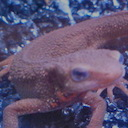

True

In [21]:
def BGR2YCbCr(img):
  H,W,_ = img.shape

  ycbcr = np.zeros([H,W,3],dtype=np.float32)

  ycbcr[..., 0] = 0.2990 * img[..., 2] + 0.5870 * img[..., 1] + 0.1140 * img[..., 0]
  ycbcr[..., 1] = -0.1687 * img[..., 2] - 0.3313 * img[..., 1] + 0.5 * img[..., 0] + 128.
  ycbcr[..., 2] = 0.5 * img[..., 2] - 0.4187 * img[..., 1] - 0.0813 * img[..., 0] + 128.

  return ycbcr

def YCbCr2BGR(ycbcr):
  H, W, _ = ycbcr.shape

  out = np.zeros([H, W, channel], dtype=np.float32)
  out[..., 2] = ycbcr[..., 0] + (ycbcr[..., 2] - 128.) * 1.4020
  out[..., 1] = ycbcr[..., 0] - (ycbcr[..., 1] - 128.) * 0.3441 - (ycbcr[..., 2] - 128.) * 0.7139
  out[..., 0] = ycbcr[..., 0] + (ycbcr[..., 1] - 128.) * 1.7718

  out = np.clip(out, 0, 255)
  out = out.astype(np.uint8)

  return out

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

ycbcr = BGR2YCbCr(img)

ycbcr[..., 0] *= 0.7
out = YCbCr2BGR(ycbcr)

cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

In [ ]:
T = 8
K = 8
channel = 3


# BGR -> Y Cb Cr
def BGR2YCbCr(img):
  H, W, _ = img.shape

  ycbcr = np.zeros([H, W, 3], dtype=np.float32)

  ycbcr[..., 0] = 0.2990 * img[..., 2] + 0.5870 * img[..., 1] + 0.1140 * img[..., 0]
  ycbcr[..., 1] = -0.1687 * img[..., 2] - 0.3313 * img[..., 1] + 0.5 * img[..., 0] + 128.
  ycbcr[..., 2] = 0.5 * img[..., 2] - 0.4187 * img[..., 1] - 0.0813 * img[..., 0] + 128.

  return ycbcr

# Y Cb Cr -> BGR
def YCbCr2BGR(ycbcr):
  H, W, _ = ycbcr.shape

  out = np.zeros([H, W, channel], dtype=np.float32)
  out[..., 2] = ycbcr[..., 0] + (ycbcr[..., 2] - 128.) * 1.4020
  out[..., 1] = ycbcr[..., 0] - (ycbcr[..., 1] - 128.) * 0.3441 - (ycbcr[..., 2] - 128.) * 0.7139
  out[..., 0] = ycbcr[..., 0] + (ycbcr[..., 1] - 128.) * 1.7718

  out = np.clip(out, 0, 255)
  out = out.astype(np.uint8)

  return out


# DCT weight
def DCT_w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

# DCT
def dct(img):
    H, W, _ = img.shape

    F = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for v in range(T):
                    for u in range(T):
                        for y in range(T):
                            for x in range(T):
                                F[v+yi, u+xi, c] += img[y+yi, x+xi, c] * DCT_w(x,y,u,v)

    return F


# IDCT
def idct(F):
    H, W, _ = F.shape

    out = np.zeros((H, W, channel), dtype=np.float32)

    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c] * DCT_w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out

# Quantization
def quantization(F):
    H, W, _ = F.shape

    Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
                (12, 12, 14, 19, 26, 58, 60, 55),
                (14, 13, 16, 24, 40, 57, 69, 56),
                (14, 17, 22, 29, 51, 87, 80, 62),
                (18, 22, 37, 56, 68, 109, 103, 77),
                (24, 35, 55, 64, 81, 104, 113, 92),
                (49, 64, 78, 87, 103, 121, 120, 101),
                (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

    for ys in range(0, H, T):
        for xs in range(0, W, T):
            for c in range(channel):
                F[ys: ys + T, xs: xs + T, c] =  np.round(F[ys: ys + T, xs: xs + T, c] / Q) * Q

    return F


# JPEG without Hufman coding
def JPEG(img):
    # BGR -> Y Cb Cr
    ycbcr = BGR2YCbCr(img)

    # DCT
    F = dct(ycbcr)

    # quantization
    F = quantization(F)

    # IDCT
    ycbcr = idct(F)

    # Y Cb Cr -> BGR
    out = YCbCr2BGR(ycbcr)

    return out


# MSE
def MSE(img1, img2):
    H, W, _ = img1.shape
    mse = np.sum((img1 - img2) ** 2) / (H * W * channel)
    return mse

# PSNR
def PSNR(mse, vmax=255):
    return 10 * np.log10(vmax * vmax / mse)

# bitrate
def BITRATE():
    return 1. * T * K * K / T / T


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# JPEG
out = JPEG(img)

# MSE
mse = MSE(img, out)

# PSNR
psnr = PSNR(mse)

# bitrate
bitrate = BITRATE()

print("MSE:", mse)
print("PSNR:", psnr)
print("bitrate:", bitrate)

# Save result
cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)